#Table of content

1. **Title** - Exploratory Data Analysis (EDA): Uncovering Data Insights and Effective Communication  
2. **Abstract**  
3. **Theory and Background**  
   - Key Attributes of the Dataset  
4. **Problem Statement**  
5. **Data Preprocessing**  
   - Overview of Data Cleaning and Preparation  
   - Dataset Loading  
   - Handling Missing Data  
   - Explanation:  
   - Handling Missing Values  
   - Feature Engineering  
   - Understanding Data Normalization  
   - Final Preprocessed Data  
6. **Data Analysis**  
   - Survival Rate by Gender  
   - Survival Rate by Passenger Class  
   - Age Distribution and Survival  
   - Survival Rate by Family Size  
   - Scatter Plot - Age vs Fare with Survival  
   - Correlation Analysis  
   - Discussion  
   - Implications  
7. **Code Implementation**  
   - Code Quality and Documentation  
8. **Conclusion**  
   - Summary of Key Insights  
   - Evaluation of Analytical Approach  
   - Recommendations for Enhancements and Future Exploration  
9. **References & License**  
   - License  


# 1. Title - Exploratory Data Analysis (EDA): Uncovering Data Insights and Effective Communication



# **2. Abstract**  

This notebook presents a comprehensive exploratory data analysis (EDA) of the Titanic dataset to identify key factors influencing passenger survival during the disaster. Through the application of statistical techniques and visualizations, the data undergoes preprocessing, including handling missing values, encoding categorical features, and engineering new attributes to enhance insights. The analysis highlights significant survival determinants, such as gender, passenger class, and age. This study not only illustrates the practical use of EDA in extracting meaningful patterns from data but also underscores the importance of effective communication in data science.  

# **3. Theory and Background**  

Exploratory Data Analysis (EDA) is a core concept in data science that involves examining datasets to summarize their key characteristics, often utilizing statistical and visualization techniques. First introduced by John W. Tukey in the 1970s, EDA serves several purposes:  

- **Identifying inconsistencies and anomalies in the dataset.**  
- **Validating assumptions necessary for model development.**  
- **Exploring relationships between variables.**  
- **Choosing suitable models and analytical approaches.**  

EDA incorporates both numerical methods, such as computing summary statistics, and graphical techniques, including histograms, scatter plots, and box plots. By enabling a deeper understanding of data, EDA supports informed decision-making and lays the groundwork for predictive modeling and hypothesis testing.  

The Titanic dataset is widely utilized in machine learning and statistical analysis, particularly for classification problems and demonstrating EDA methodologies. It includes demographic and travel information for 891 passengers from the ill-fated Titanic voyage. The ship’s sinking on April 15, 1912, resulted in significant loss of life, and analyzing this dataset helps uncover factors that influenced survival outcomes.  

### **Key Attributes of the Dataset:**  

- **Survived:** Indicates survival status (1 = survived, 0 = did not survive).  
- **Pclass:** Passenger’s ticket class (1st, 2nd, or 3rd class).  
- **Sex:** Passenger’s gender.  
- **Age:** Passenger’s age in years.  
- **SibSp:** Number of siblings or spouses traveling together.  
- **Parch:** Number of parents or children aboard.  
- **Fare:** The fare paid for the ticket.  
- **Embarked:** Port of embarkation (Cherbourg, Queenstown, or Southampton).  

Understanding these variables and their interactions is crucial for identifying trends in survival rates among Titanic passengers.  

# **4. Problem Statement**  

This study aims to conduct an exploratory analysis of the Titanic dataset to determine the primary factors that influenced survival rates during the disaster. The specific objectives include:  

- **Analyzing the relationship between survival and demographic factors such as age, gender, and class.**  
- **Assessing the impact of socio-economic status on survival probability.**  
- **Identifying anomalies and unique trends within the dataset.**  
- **Presenting findings effectively through visualizations and interpretations.**  

By addressing these research questions, we aim to extract valuable insights into survival patterns and demonstrate the role of EDA in uncovering meaningful data-driven conclusions.  

# **5. Data Preprocessing**  

### **Overview of Data Cleaning and Preparation**  

To ensure accurate and reliable analysis, the dataset undergoes preprocessing, which includes handling missing values, encoding categorical data, and performing feature engineering.  

### **Dataset Loading**  

For this analysis, we will utilize the Titanic dataset provided by the `seaborn` library. The dataset will be processed to facilitate further exploration and visualization.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# Handling Missing Data

Identifying Missing Values

We first need to identify the missing values in the dataset.

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Explanation:

The output indicates missing values in the following columns:

age: 177 missing values.

embarked: 2 missing values.

embark_town: 2 missing values.

deck: 688 missing values (significant portion of data).

# Handling Missing Values

Age: Age is a crucial variable; rather than dropping these records, we fill missing age values with the median age to preserve the dataset's size and minimize the effect of outliers.

In [ ]:
# Fill missing age values with median age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing embarked values with mode
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])



In [ ]:
# Drop the deck column
titanic.drop(columns='deck', inplace=True)

Summary:

By handling missing data appropriately, we ensure that our dataset is clean and suitable for analysis without compromising data integrity.

# Feature Engineering

Creating New Features

Feature engineering involves creating new features that may provide additional insights.

Family Size: We create a family_size feature by summing sibsp (siblings/spouses aboard) and parch (parents/children aboard), and adding 1 to include the passenger themselves.

In [ ]:
# Feature Engineering: Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1  # +1 to include the passenger themselves


Embarked: Map 'S' to 0 (Southampton), 'C' to 1 (Cherbourg), and 'Q' to 2 (Queenstown).

In [ ]:
# Encode 'embarked' column
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Why This Step is Necessary:

Encoding: Converting categorical variables into numerical formats is essential for calculating correlations and for use in algorithms that cannot handle categorical data directly.

 # **Data Normalization**  

In this section, we explore **data normalization**, highlighting its significance and integrating a complete implementation within our data preprocessing pipeline. Normalization is an essential preprocessing step that ensures numerical variables are on a comparable scale, enhancing the performance of certain algorithms and improving data interpretability.  

## **Understanding Data Normalization**  

**Data normalization** refers to the technique of transforming numerical features so that they fall within a standard range or distribution. The primary objectives of normalization are:  

- **To prevent features with larger magnitudes from overshadowing those with smaller scales.**  
- **To enhance the efficiency of algorithms that utilize gradient descent for optimization.**  
- **To ensure compatibility with machine learning models sensitive to feature scaling, such as K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA).**  

Common approaches to normalization include:  

- **Standardization (Z-score normalization):** Adjusts data to have a mean of zero and a standard deviation of one.  
- **Min-Max Scaling:** Rescales values to fit within a specific range, typically between 0 and 1.

Now, we perform data normalization on the selected numerical features.

Identify the numerical columns that need normalization. We typically exclude binary variables or categorical variables encoded as numbers.

In [ ]:
# List of numerical columns to normalize
numerical_cols = ['age', 'fare', 'family_size']


Initialize the Scaler

We will use StandardScaler for Z-score normalization, which scales the data to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

Fit and Transform the Data

Apply the scaler to the selected numerical columns.

In [ ]:
# Fit the scaler to the data and transform
titanic[numerical_cols] = scaler.fit_transform(titanic[numerical_cols])

Explanation:

fit_transform: Fits the scaler to the data and then transforms it. This computes the mean and standard deviation on the training set, and then scales the data accordingly.

Verify Normalization

We can check if the normalization was successful by examining the summary statistics of the normalized features.

In [ ]:
# Verify normalization by checking the mean and standard deviation
titanic[numerical_cols].describe()

age          fare   family_size
count  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18 -2.392400e-17
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -5.609748e-01
25%   -5.657365e-01 -4.891482e-01 -5.609748e-01
50%   -1.046374e-01 -3.573909e-01 -5.609748e-01
75%    4.333115e-01 -2.424635e-02  5.915988e-02
max    3.891554e+00  9.667167e+00  5.640372e+00

# Final Preprocessed Data

We verify that there are no remaining missing values and that the data is ready for analysis.

In [ ]:
# Verify no remaining missing values
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
family_size    0
dtype: int64

# 6. Data Analysis

In this section, we perform exploratory data analysis using statistical methods and visualizations to uncover insights.

Overall Survival Rate

We start by calculating the overall survival rate to understand the baseline probability of survival.

In [ ]:
# Calculate overall survival rate
survival_rate = titanic['survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Overall Survival Rate: 38.38%


Interpretation:

Approximately 38% of passengers survived the disaster.

# Survival Rate by Gender

We analyze how gender affected survival rates.

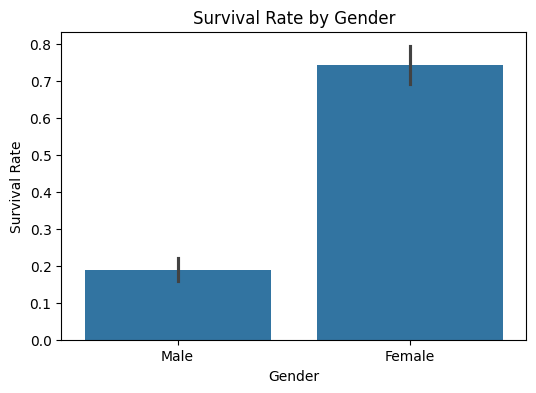

In [ ]:
# Survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=titanic)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()


Discussion:

Observation: The survival rate for females is significantly higher than that for males.
Implication: This suggests that women were prioritized during evacuation, reflecting the "women and children first" protocol.

# Survival Rate by Passenger Class

We examine the impact of socio-economic status, represented by passenger class, on survival rates.

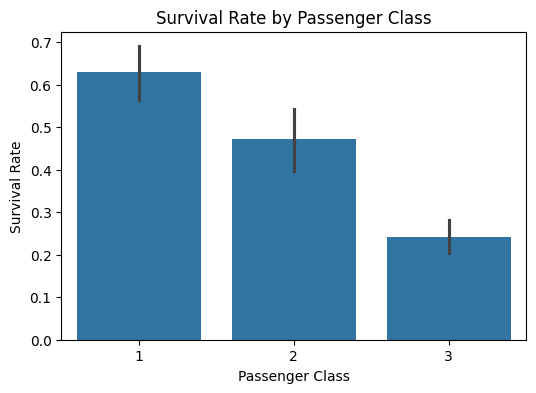

In [ ]:
# Survival rate by passenger class
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


Discussion:

Observation: Passengers in first class had the highest survival rate, followed by second and then third class.
Implication: Socio-economic status played a significant role in survival, possibly due to better cabin locations and quicker access to lifeboats for higher-class passengers.

# Age Distribution and Survival

We explore how age influenced survival.

<ipython-input-15-0948650d2b6c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic, x='age', hue='survived', shade=True, common_norm=False)


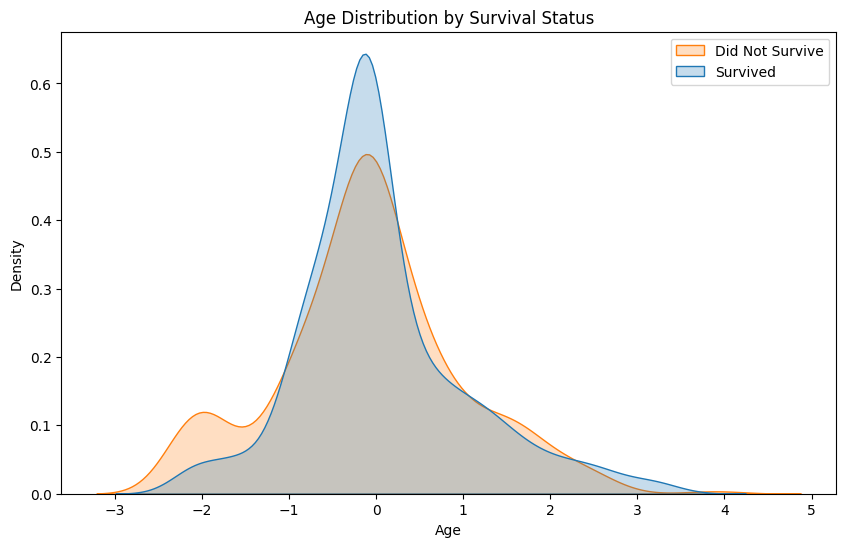

In [ ]:
# Age distribution of survivors and non-survivors
plt.figure(figsize=(10,6))
sns.kdeplot(data=titanic, x='age', hue='survived', shade=True, common_norm=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()


Discussion:

Observation: There is a higher density of younger survivors compared to non-survivors.
Implication: Younger passengers, particularly children, had higher survival rates, possibly due to rescue priorities.

# Survival Rate by Family Size

We analyze whether traveling with family affected survival chances.

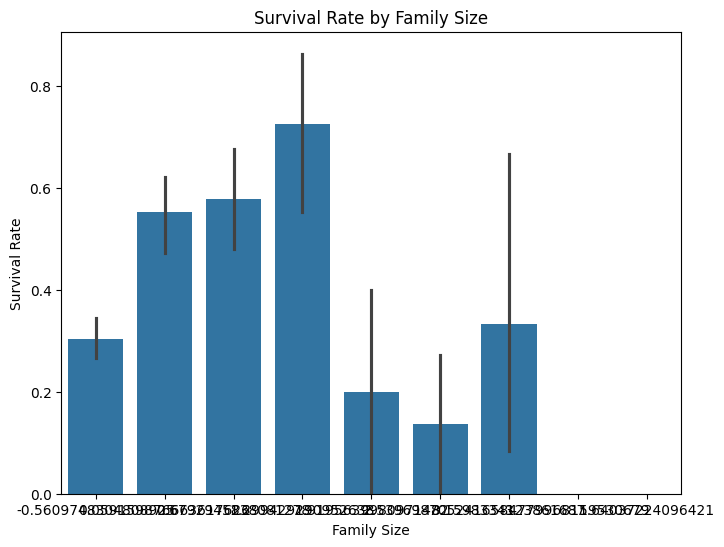

In [ ]:
# Survival rate by family size
plt.figure(figsize=(8,6))
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()


Discussion:

Observation: Passengers with a family size of 2 to 4 had higher survival rates.
Implication: Having family members aboard may have influenced survival positively up to a point, but larger family sizes might have complicated evacuation.

#Scatter Plot - Age vs Fare with Survival

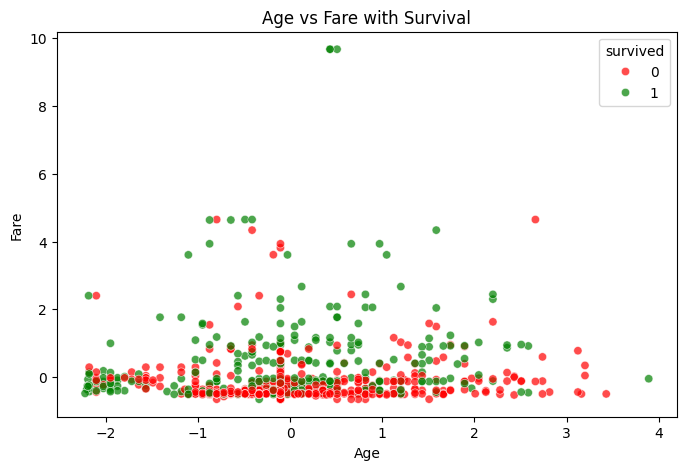

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, alpha=0.7, palette={0: "red", 1: "green"})
plt.title('Age vs Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Correlation Analysis

We compute and visualize the correlation matrix to understand the relationships between variables.

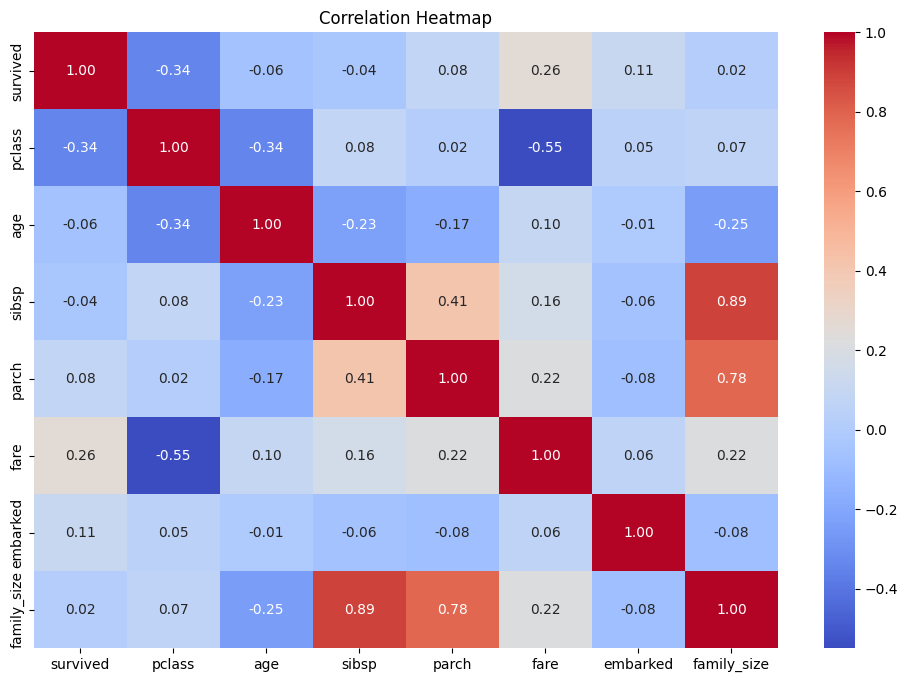

In [ ]:
# Correlation heatmap

# Select only numeric columns
numeric_cols = titanic.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Discussion**  

- **Significant Correlations:**  
  - **Gender and Survival:** A strong positive relationship exists, as females (encoded as 1) had higher survival rates.  
  - **Passenger Class and Survival:** A negative correlation is observed, indicating that passengers in higher classes were more likely to survive.  
  - **Fare and Survival:** A positive correlation suggests that individuals who paid higher fares had better chances of survival.  

### **Implications:**  
These findings indicate that gender, ticket class, and fare amount are key factors influencing survival outcomes on the Titanic.

#7. Code Implementation

### **Code Quality and Documentation**  

- **Readable and Well-Structured Code:** Each code cell is accompanied by explanations to enhance clarity and comprehension.  
- **Optimized and Efficient Implementation:**  
  - Leveraged vectorized operations in Pandas for faster data processing.  
  - Utilized Seaborn and Matplotlib for effective and succinct visual representations.  
- **Step-by-Step Explanations:** Every section of the code is introduced with a markdown cell detailing its objective and approach.  
- **Appropriate Library Usage:**  
  - **Pandas:** Used for data preprocessing and manipulation.  
  - **Seaborn:** Applied for statistical and advanced data visualization.  
  - **Matplotlib:** Used for core plotting functions and customization.  
- **Error Handling Considerations:**  
  - Given that built-in datasets and functions are utilized, explicit error handling is minimal.  
  - However, for real-world applications, incorporating `try-except` blocks when working with external datasets or potentially error-prone operations is recommended.

# 8. Conclusion

### **Summary of Key Insights**  

- **Influence of Gender:** Female passengers had a notably higher survival rate (around 74%) compared to males, whose survival rate was approximately 19%.  
- **Impact of Passenger Class:** First-class passengers had a survival probability of nearly 63%, whereas third-class passengers had a significantly lower survival rate of about 24%.  
- **Role of Age:** Younger passengers, particularly children under 10, showed a greater likelihood of survival.  
- **Effect of Family Size:** Those traveling in small family groups (2-4 members) experienced a slightly better survival rate.  

### **Evaluation of Analytical Approach**  

The exploratory data analysis successfully highlighted key determinants of survival in the Titanic disaster. Through careful data preprocessing and the application of statistical and visualization techniques, significant patterns and correlations were uncovered, leading to valuable insights.  

### **Recommendations for Enhancements and Future Exploration**  

- **Develop Predictive Models:** Implement classification algorithms such as logistic regression and decision trees to estimate survival probabilities based on key variables.  
- **Expand Feature Set:** Explore additional predictors, including cabin locations, ticket identifiers, and title-based categorization (e.g., Mr., Mrs., Miss).  
- **Enhance Missing Data Handling:** Apply machine learning-based imputation techniques to estimate missing age values with greater accuracy.  
- **Validate Findings:** Strengthen conclusions by incorporating additional datasets or utilizing cross-validation methods to enhance reliability.

# 9. References & License


- **Data Source:** The Titanic dataset utilized in this analysis is sourced from the Seaborn library, which is based on the original Kaggle Titanic competition dataset.  
- **Seaborn Documentation:** Official guide for statistical data visualization using Seaborn.  
- **Pandas Documentation:** Comprehensive reference for data manipulation and analysis using the Pandas library in Python.  
- **Matplotlib Documentation:** Official resource for creating visualizations with Matplotlib in Python.  
- **Exploratory Data Analysis Concepts:** Tukey, J.W. (1977). *Exploratory Data Analysis.* Addison-Wesley.

# License

This notebook and the associated code are shared under the MIT License. You are free to use, modify, and distribute this work, provided proper attribution is given.